In [191]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


sns.set_theme()

## Data load

In [192]:
budget_raw = pd.read_csv('../data/preprocessed/dotacie_ours_final.csv')
graduates_raw = pd.read_csv('../data/preprocessed/cvtisr/graduates.csv', sep=';')
teachers_degrees_raw = pd.read_csv('../data/preprocessed/cvtisr/teachers_degrees.csv', sep=';')

In [193]:
budget_raw.columns = ['year', 'uni', 'budget', 'salary_budget', 'students_budget', 'students', 'students_full_time_budget', 'dorm_cap', 'dorm_students', 'dorm_budget', 'pub_07711', 'pub_07712', 'inflation_rate', 'budget_ia']
budget_raw['other_budget'] = budget_raw['budget'] - budget_raw['students_budget'] - budget_raw['salary_budget'] - budget_raw['dorm_budget']
budget_raw.head(5)

,year,uni,budget,salary_budget,students_budget,students,students_full_time_budget,dorm_cap,dorm_students,dorm_budget,pub_07711,pub_07712,inflation_rate,budget_ia,other_budget
0,2009,UK,77024564.0,34788075,8631773,28439.0,21819.0,10969.0,9721.0,794240.0,NaN,NaN,1.0,77024560.0,32810476.0
1,2009,UPJŠ,21034251.0,9489758,2462852,8137.0,7035.0,1776.0,1775.0,128336.0,NaN,NaN,1.0,21034252.0,8953305.0
2,2009,PU,17921955.0,7287384,3728125,12399.0,7415.0,1913.0,2007.0,161600.0,NaN,NaN,1.0,17921956.0,6744846.0
3,2009,UCM,6960463.0,3211301,964838,7129.0,4742.0,224.0,222.0,14784.0,NaN,NaN,1.0,6960463.0,2769540.0
4,2009,UVL,9082561.0,4322490,601068,1454.0,1294.0,830.0,778.0,41584.0,NaN,NaN,1.0,9082561.0,4117419.0


In [194]:
graduates_raw.columns = ['uni', 'year', 'first_full_time', 'first_part_time', 'third_full_time', 'third_part_time', 'third_external_inst']
graduates_raw.head(5)

,uni,year,first_full_time,first_part_time,third_full_time,third_part_time,third_external_inst
0,AU,2009,189,0,6,1,0
1,AU,2010,199,0,7,1,0
2,AU,2011,200,0,8,3,0
3,AU,2012,196,0,12,4,0
4,AU,2013,173,0,7,8,0


In [195]:
teachers_degrees_raw.columns = ['uni', 'year', 'teacher_type', 'employment_type', 'drsc', 'phd', 'other', 'total']
teachers_degrees_raw.head(5)

,uni,year,teacher_type,employment_type,drsc,phd,other,total
0,AU,2009,asistent,full-time,0,0,10,10
1,AU,2009,asistent,part-time,0,0,3,3
2,AU,2009,docent,full-time,0,4,9,13
3,AU,2009,docent,part-time,0,1,2,3
4,AU,2009,hosťujúci profesor,full-time,0,0,0,0


## Overall budget change

In [196]:
budget_totals = (
    pd.concat(
        [
            budget_raw.groupby('year')['budget'].sum().to_frame('budget'),
            budget_raw.groupby('year')['salary_budget'].sum().to_frame('salary_budget'),
            budget_raw.groupby('year')['students_budget'].sum().to_frame('students_budget'),
            budget_raw.groupby('year')['dorm_budget'].sum().to_frame('dorm_budget'),
            budget_raw.groupby('year')['other_budget'].sum().to_frame('other_budget'),
        ], axis = 1)
        .reset_index()
)
budget_totals['salary_budget_share'] = budget_totals['salary_budget'] / budget_totals['budget']
budget_totals['students_budget_share'] = budget_totals['students_budget'] / budget_totals['budget']
budget_totals['dorm_budget_share'] = budget_totals['dorm_budget'] / budget_totals['budget']
budget_totals['other_budget_share'] = budget_totals['other_budget'] / budget_totals['budget']
budget_totals.head(5)


,year,budget,salary_budget,students_budget,dorm_budget,other_budget,salary_budget_share,students_budget_share,dorm_budget_share,other_budget_share
0,2009,3.829316e+08,172547633,50274862,3352848.0,1.482603e+08,0.450596,0.131289,0.008756,0.387172
1,2010,3.941945e+08,177193101,45552844,3326000.0,1.631544e+08,0.449507,0.115559,0.008437,0.413893
2,2011,3.925506e+08,122195435,47744810,3288800.0,2.193216e+08,0.311286,0.121627,0.008378,0.558709
3,2012,3.091253e+08,126633305,52043774,3288800.0,1.271595e+08,0.409650,0.168358,0.010639,0.411352
4,2013,4.103603e+08,126633305,53252028,3425888.0,2.270491e+08,0.308591,0.129769,0.008348,0.553292


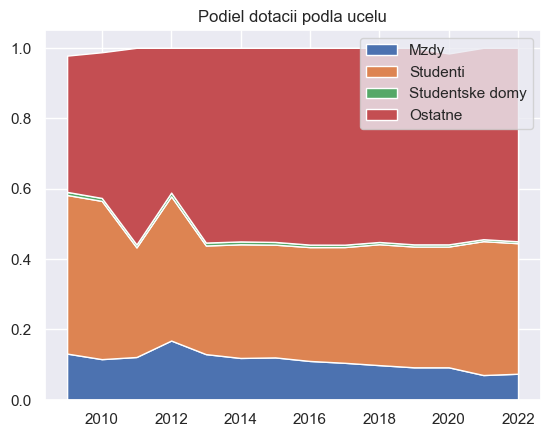

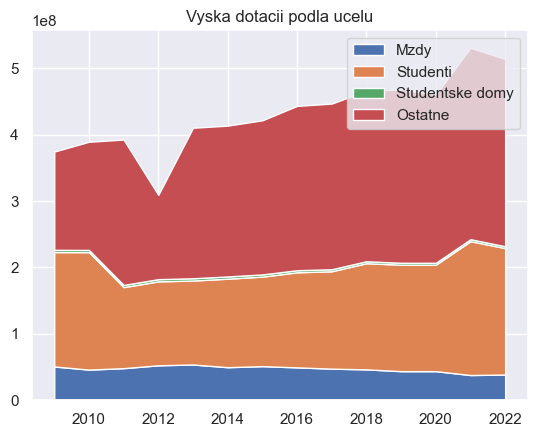

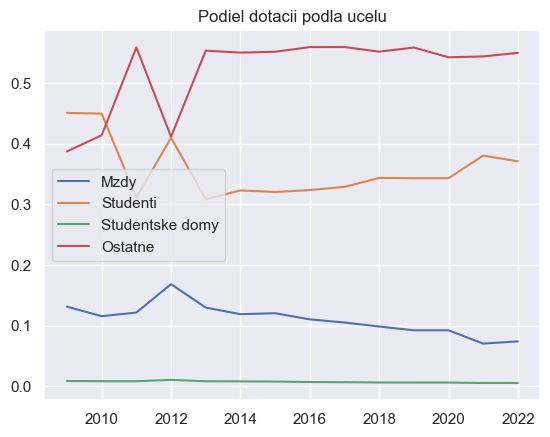

In [197]:
stacked_salary_chart_y = budget_totals[['students_budget_share', 'salary_budget_share', 'dorm_budget_share', 'other_budget_share']].values.T
stacked_salary_chart_y_abs = budget_totals[['students_budget', 'salary_budget', 'dorm_budget', 'other_budget']].values.T
# # Plot
plt.stackplot(budget_totals['year'],stacked_salary_chart_y, labels=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Podiel dotacii podla ucelu')
plt.legend()
plt.show()

plt.stackplot(budget_totals['year'],stacked_salary_chart_y_abs, labels=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Vyska dotacii podla ucelu')
plt.legend()
plt.show()


plt.plot(budget_totals['year'],stacked_salary_chart_y.T, label=['Mzdy', 'Studenti', 'Studentske domy', 'Ostatne'])
plt.title('Podiel dotacii podla ucelu')
plt.legend()
plt.show()

In [198]:
teachers_degrees = teachers_degrees_raw.copy()
teachers_degrees['employment_type'].value_counts()
teachers_degrees['weight'] = teachers_degrees.apply(lambda x: 1 if x.employment_type == 'full-time' else 0.5, axis = 1)
teachers_degrees['total'] *= teachers_degrees['weight']

In [199]:
teachers_types = pd.pivot_table(teachers_degrees.groupby(['uni', 'year', 'teacher_type'])['total'].sum().to_frame('teachers').reset_index(), index = ['uni', 'year'], columns='teacher_type', fill_value=0).reset_index()
teachers_types.columns = ['uni', 'year', 'asistent', 'docent', 'hostujuci_profesor', 'lektor', 'odborny_asistent', 'profesor']
teachers_types = teachers_types.merge(budget_raw[['uni', 'year', 'salary_budget']], on = ['uni', 'year'], how = 'left')
teachers_types = teachers_types.dropna()

teachers_types['ucitelia_spolu'] = sum([teachers_types[col] for col in ['asistent', 'docent', 'hostujuci_profesor', 'lektor', 'odborny_asistent', 'profesor']])
display(teachers_types)
teachers_types.to_csv('../data/preprocessed/teachers_types_simplified.csv', index = False)

,uni,year,asistent,docent,hostujuci_profesor,lektor,odborny_asistent,profesor,salary_budget,ucitelia_spolu
0,AU,2009,11.5,14.5,0,0.0,44.0,33.0,1448749,103.0
1,AU,2010,5.0,18.0,0,0.0,48.5,34.0,1479444,105.5
2,AU,2011,7.0,18.5,0,0.0,55.5,34.5,1147907,115.5
3,AU,2012,5.5,22.0,0,0.0,52.5,35.0,1187816,115.0
4,AU,2013,7.0,24.0,0,0.0,54.0,35.5,1223047,120.5
...,...,...,...,...,...,...,...,...,...,...
275,ŽU,2018,9.5,148.0,0,27.0,312.5,86.0,10899800,583.0
276,ŽU,2019,11.0,149.0,0,26.5,300.5,90.0,10994390,577.0
277,ŽU,2020,10.0,151.0,0,23.5,296.0,84.0,10994390,564.5
278,ŽU,2021,9.0,159.5,0,24.0,260.5,87.0,13183264,540.0


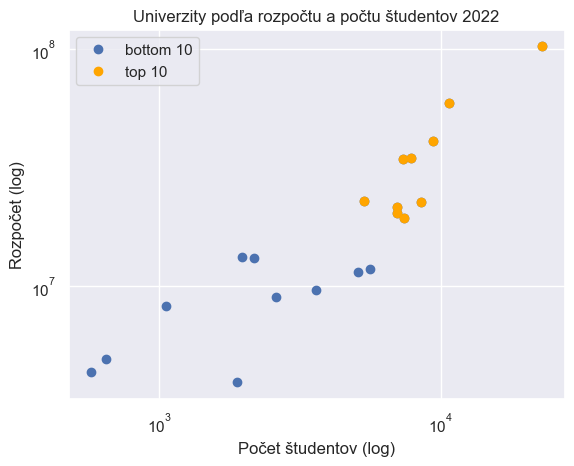

In [200]:
plt.plot(budget_raw.query('year == 2022')['students'], budget_raw.query('year == 2019')['budget'], 'o')
plt.loglog()
pass

top10 = budget_raw.query('year==2022').sort_values('budget', ascending=False).head(10)['uni'].unique()
budget = budget_raw.query('uni in @top10')
plt.plot(budget.query('year == 2022')['students'], budget.query('year == 2019')['budget'], 'o', color = 'orange')
plt.title('Univerzity podľa rozpočtu a počtu študentov 2022')
plt.xlabel('Počet študentov (log)')
plt.ylabel('Rozpočet (log)')
plt.legend(['bottom 10', 'top 10'])
plt.show()

## Regresna analyza

In [201]:
from sklearn.linear_model import LinearRegression

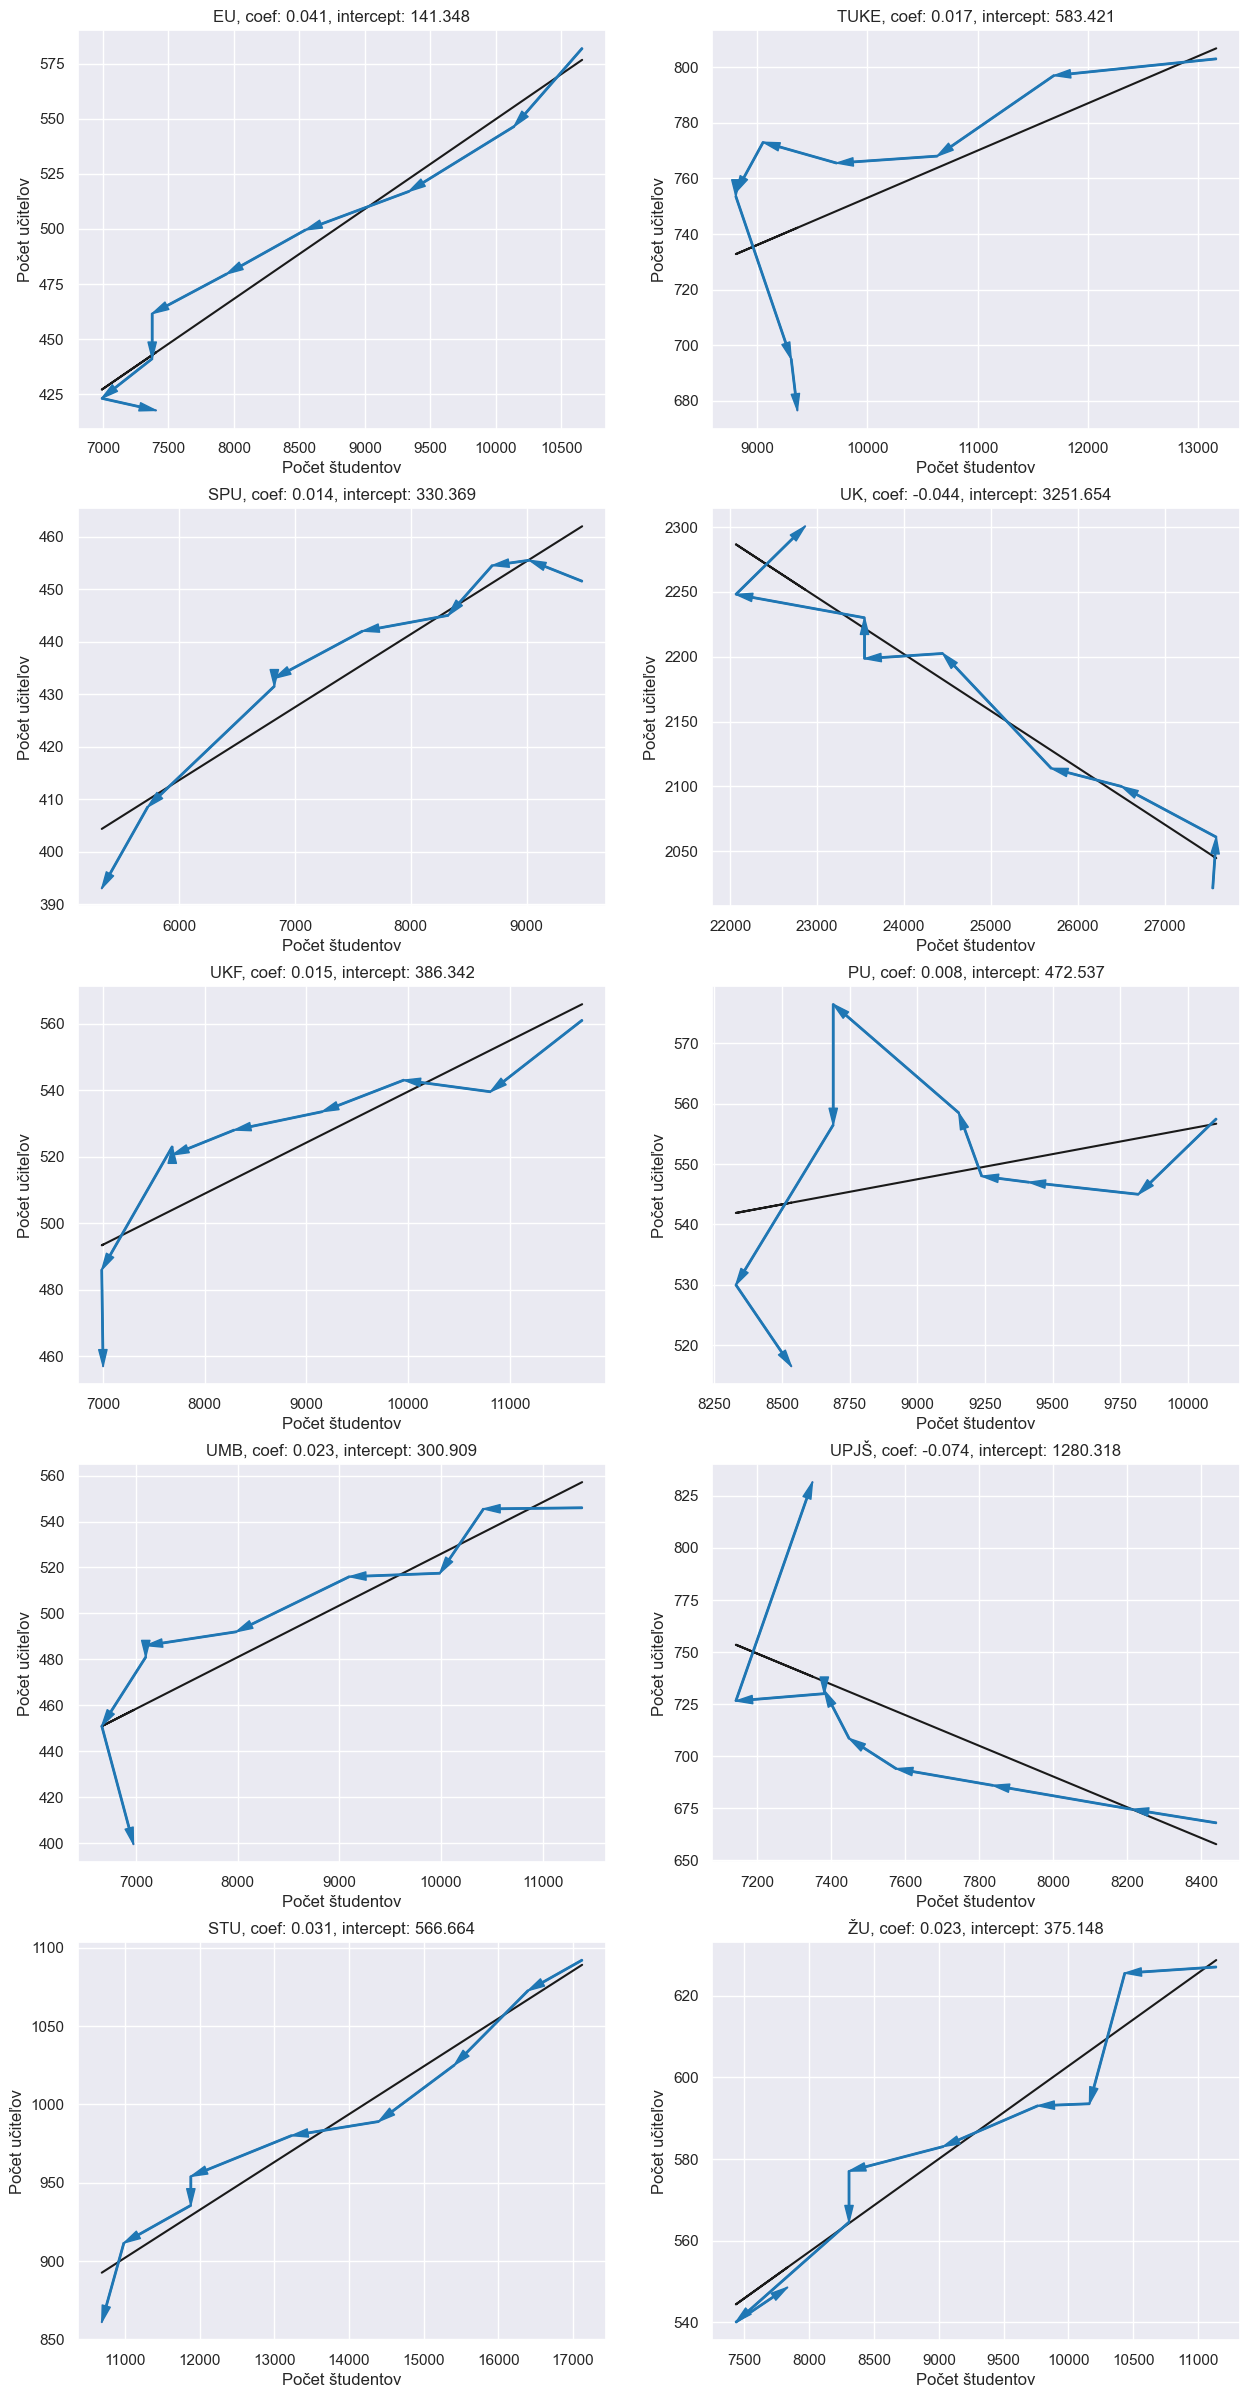

In [313]:
features = teachers_types.query('uni in @top10').merge(budget_raw[['year', 'uni', 'students', 'inflation_rate']], on = ['year', 'uni'], how = 'left').sort_values(['year'])

cols = 2
rows = 5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (15, 30))

for i, uni in enumerate(features['uni'].unique()):
    r = i // cols
    c = i % cols
    model = LinearRegression()
    X_students_teachers = features.query('uni == @uni and year > 2013')[['students']].values
    y_students_teachers = features.query('uni == @uni and year > 2013')['ucitelia_spolu']
    model.fit(X_students_teachers, y_students_teachers)
    model.coef_
    
    for t in range(len(y_students_teachers)-1):
        ax[r][c].annotate('',xy=(X_students_teachers[t+1][0], list(y_students_teachers)[t+1]),xytext=(X_students_teachers[t][0], list(y_students_teachers)[t]),
        arrowprops=dict(color='#1f77b4', width=1,headwidth=6))

    y_pred = model.predict(X_students_teachers)
    ax[r][c].plot(X_students_teachers, y_students_teachers, '-') 
    ax[r][c].plot(X_students_teachers, y_pred, color='k')
    ax[r][c].set_xlabel('Počet študentov')
    ax[r][c].set_ylabel('Počet učiteľov')
    # ax[r][c].set_xlim(left=0)
    # ax[r][c].set_ylim(bottom=0)
    ax[r][c].set_title(f'{uni}, coef: {round(model.coef_[0],3)}, intercept: {round(model.intercept_,3)}')

pass   

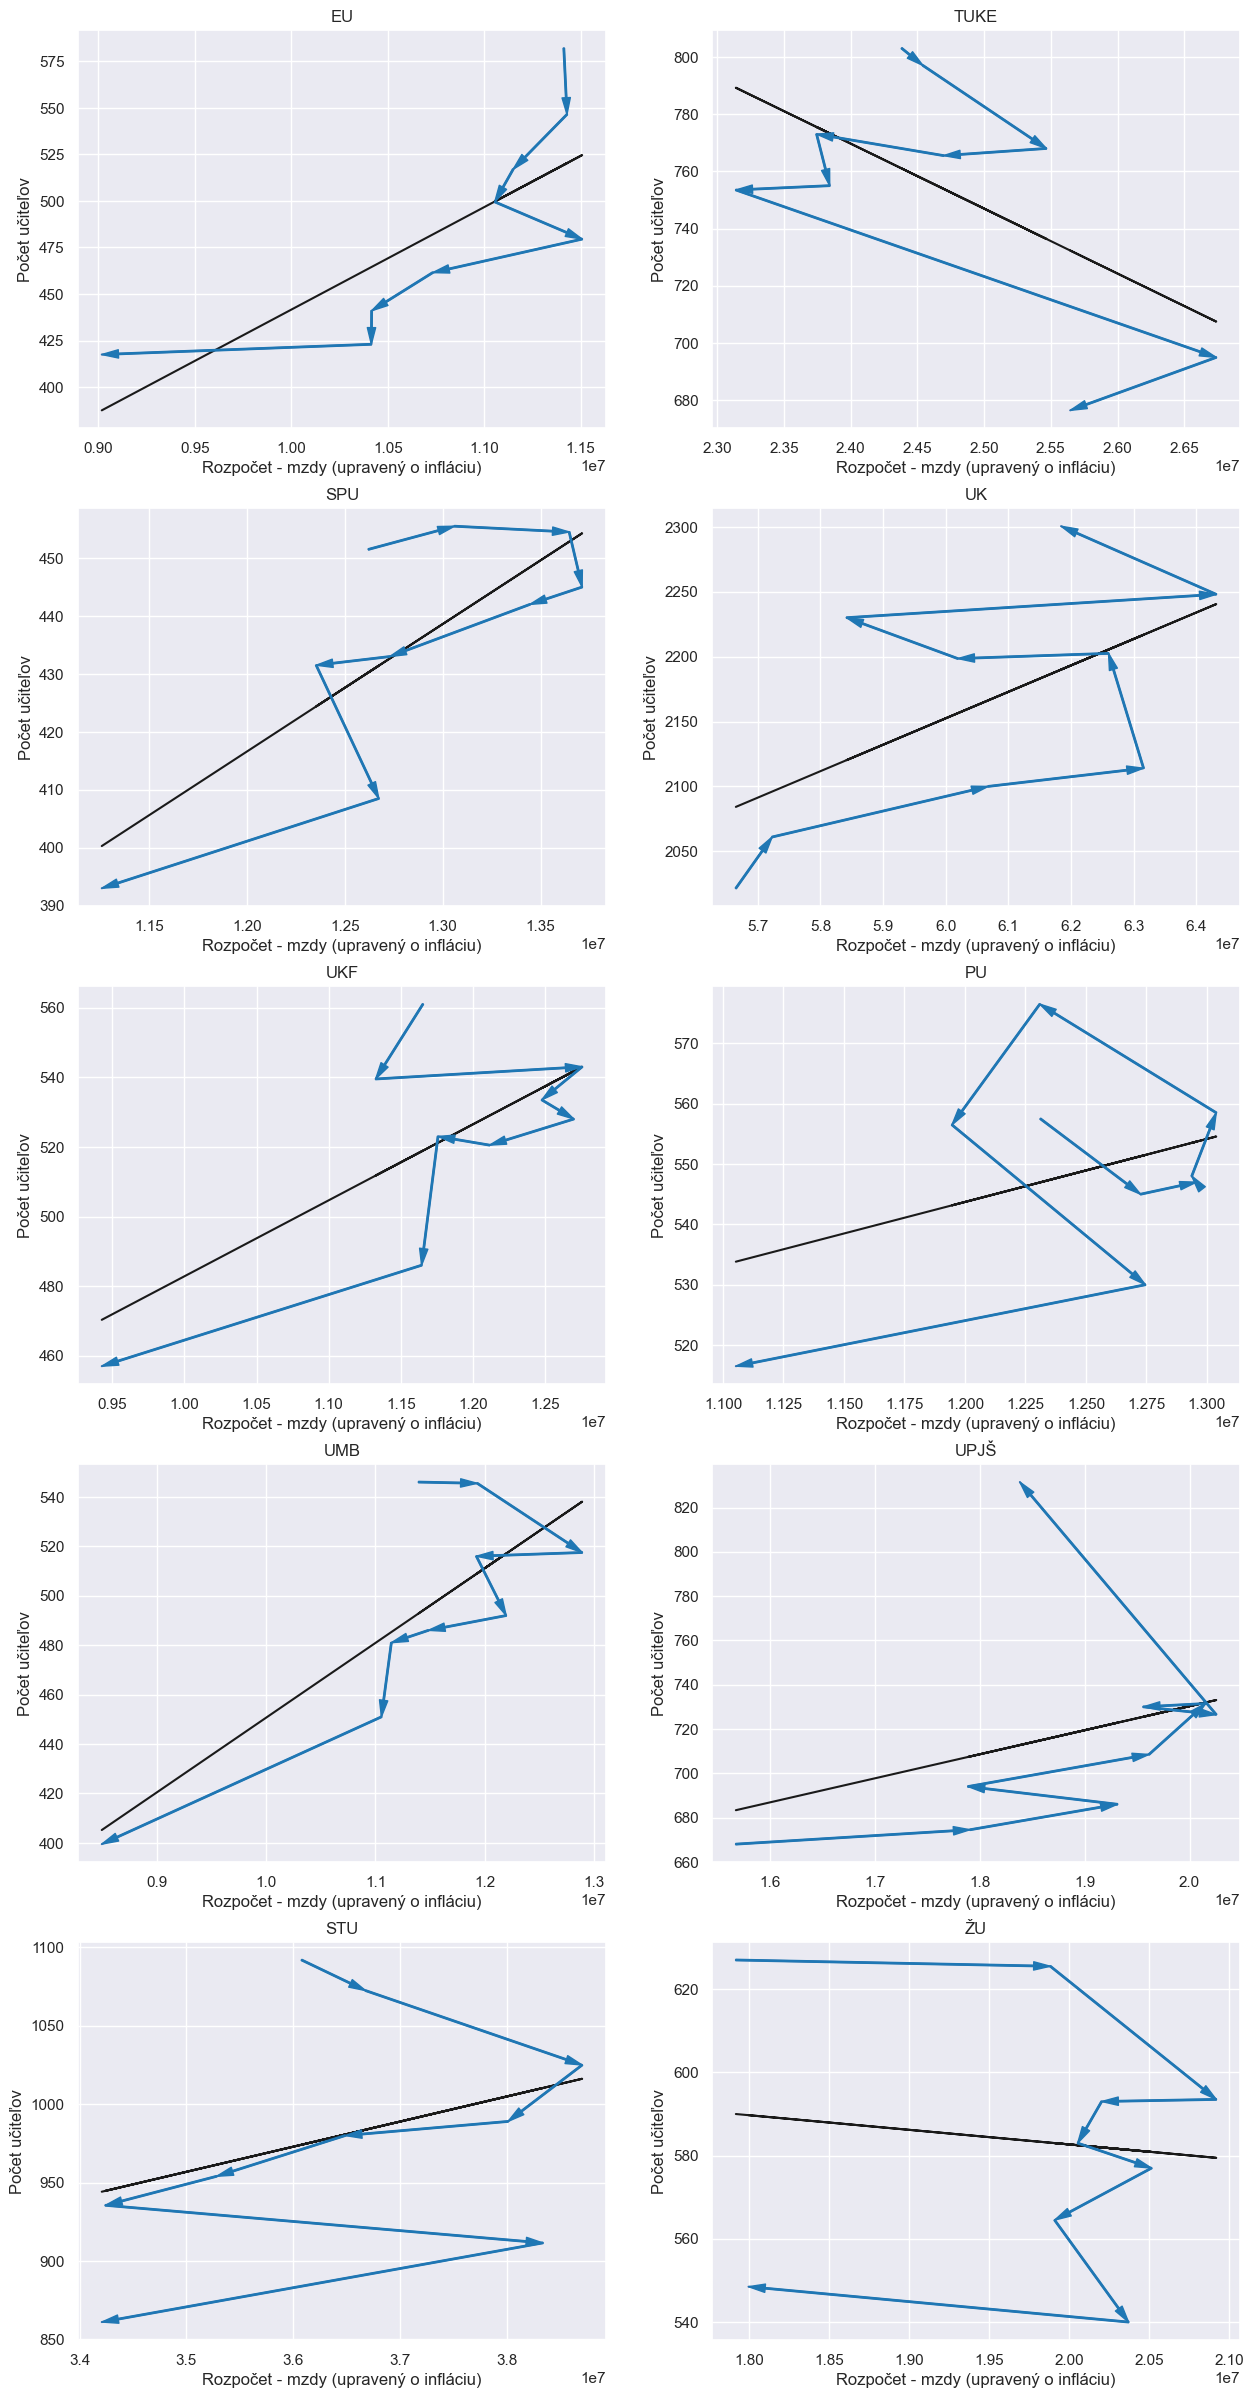

In [203]:
budget_raw['budget_wo_salary_ia'] = (budget_raw['budget'] - budget_raw['salary_budget']) / budget_raw['inflation_rate']

features = teachers_types.query('uni in @top10').merge(budget_raw[['year', 'uni', 'budget_wo_salary_ia']], on = ['year', 'uni'], how = 'left').sort_values(['year'])

cols = 2
rows = 5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (15, 30))

for i, uni in enumerate(features['uni'].unique()):
    r = i // cols
    c = i % cols
    model = LinearRegression()
    model = LinearRegression()
    X_students_teachers = features.query('uni == @uni and year > 2013')[['budget_wo_salary_ia']].values
    y_students_teachers = features.query('uni == @uni and year > 2013')['ucitelia_spolu']
    model.fit(X_students_teachers, y_students_teachers)
    model.coef_
    
    for t in range(len(y_students_teachers)-1):
        ax[r][c].annotate('',xy=(X_students_teachers[t+1][0], list(y_students_teachers)[t+1]),xytext=(X_students_teachers[t][0], list(y_students_teachers)[t]),
        arrowprops=dict(color='#1f77b4', width=1,headwidth=6))

    y_pred = model.predict(X_students_teachers)
    ax[r][c].plot(X_students_teachers, y_students_teachers, '-') 
    ax[r][c].plot(X_students_teachers, y_pred, color='k')
    ax[r][c].set_xlabel('Rozpočet - mzdy (upravený o infláciu)')
    ax[r][c].set_ylabel('Počet učiteľov')

    ax[r][c].set_title(uni)

pass
    

## Clustrovanie podľa typov vyučujúcich

In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.cluster import KMeans

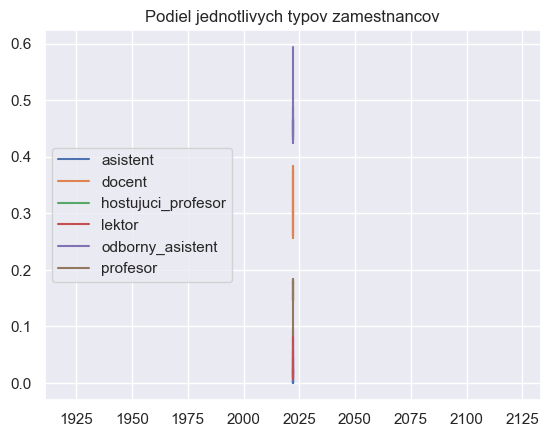

In [355]:
teachers_share = (teachers_types.query('year == 2022 and uni in @top10')
.iloc[:, :8]
.set_index(['year', 'uni']))

teachers_share['total'] = sum([teachers_share[col] for col in teachers_share.columns])


for col in teachers_share.columns:
    teachers_share[col] /= teachers_share['total']

teachers_share = teachers_share.iloc[:, :-1]

plt.plot(teachers_share.reset_index()['year'], teachers_share, label=teachers_share.columns)
plt.title('Podiel jednotlivych typov zamestnancov')
plt.legend(loc='center left')
plt.show()


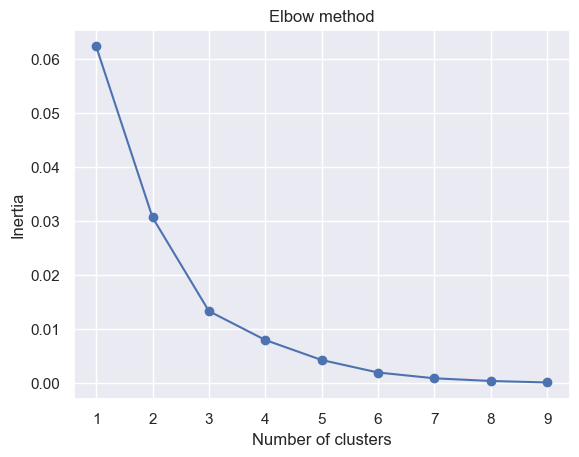

In [356]:
inertias = []


for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(teachers_share.values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


# elbow metodou vyberame 3 clustre

In [357]:
# finalne rozdelime do clustrov

kmeans = KMeans(n_clusters=3)
kmeans.fit(teachers_share.values)
clusters = kmeans.predict(teachers_share.values)
teachers_share['cluster_id'] = clusters
teachers_share['cluster_id'] = teachers_share['cluster_id'].astype(str)
teachers_share

asistent    docent  hostujuci_profesor    lektor  odborny_asistent  \
year uni                                                                        
2022 EU    0.002395  0.299401                 0.0  0.019162          0.594012   
     PU    0.022265  0.336883                 0.0  0.056147          0.433688   
     SPU   0.000000  0.344784                 0.0  0.043257          0.428753   
     STU   0.004065  0.346690                 0.0  0.009292          0.465738   
     TUKE  0.000739  0.384331                 0.0  0.012565          0.424242   
     UK    0.081504  0.257118                 0.0  0.026081          0.488807   
     UKF   0.000000  0.376368                 0.0  0.006565          0.434354   
     UMB   0.002503  0.366708                 0.0  0.012516          0.468085   
     UPJŠ  0.046302  0.259170                 0.0  0.096212          0.453397   
     ŽU    0.016408  0.321787                 0.0  0.053783          0.446673   

           profesor cluster_id  
year uni                        
2022 EU    0.085030          2  
     PU    0.151016          0  
     SPU   0.183206          0  
     STU   0.174216          0  
     TUKE  0.178123          0  
     UK    0.146490          1  
     UKF   0.182713          0  
     UMB   0.150188          0  
     UPJŠ  0.144919          1  
     ŽU    0.161349          0

In [358]:
# clustre vizualizujeme pomocou PCA

X = teachers_share.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [359]:
# doplname data z pca do dataframeu

X_pca
df_pca = pd.DataFrame(X_pca, columns=['x1', 'x2'], index=teachers_share.index).reset_index()
teachers_share['x1'] = list(df_pca['x1'])
teachers_share['x2'] = list(df_pca['x2'])

teachers_share

asistent    docent  hostujuci_profesor    lektor  odborny_asistent  \
year uni                                                                        
2022 EU    0.002395  0.299401                 0.0  0.019162          0.594012   
     PU    0.022265  0.336883                 0.0  0.056147          0.433688   
     SPU   0.000000  0.344784                 0.0  0.043257          0.428753   
     STU   0.004065  0.346690                 0.0  0.009292          0.465738   
     TUKE  0.000739  0.384331                 0.0  0.012565          0.424242   
     UK    0.081504  0.257118                 0.0  0.026081          0.488807   
     UKF   0.000000  0.376368                 0.0  0.006565          0.434354   
     UMB   0.002503  0.366708                 0.0  0.012516          0.468085   
     UPJŠ  0.046302  0.259170                 0.0  0.096212          0.453397   
     ŽU    0.016408  0.321787                 0.0  0.053783          0.446673   

           profesor cluster_id        x1        x2  
year uni                                            
2022 EU    0.085030          2  3.629423  2.743308  
     PU    0.151016          0 -0.370302 -0.850055  
     SPU   0.183206          0 -1.402179 -0.466135  
     STU   0.174216          0 -1.114482  0.633354  
     TUKE  0.178123          0 -1.981561  0.496326  
     UK    0.146490          1  2.349137 -1.147629  
     UKF   0.182713          0 -1.930728  0.622225  
     UMB   0.150188          0 -0.901438  1.024486  
     UPJŠ  0.144919          1  2.073542 -2.263434  
     ŽU    0.161349          0 -0.351412 -0.792446

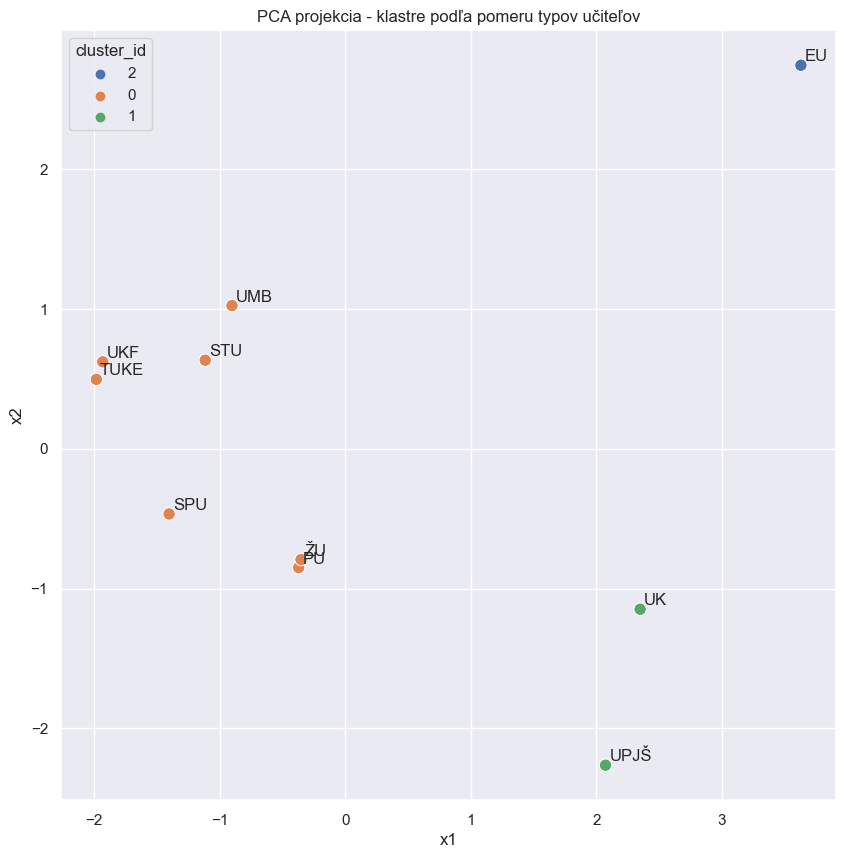

In [360]:
teachers_share['label'] = list(teachers_share.reset_index()['uni'].apply(lambda x: x if x in top10 else 'others'))
teachers_share
fig_pca, ax_pca = plt.subplots(figsize=(10, 10))
ax_pca.set_title('PCA projekcia - klastre podľa pomeru typov učiteľov')

sns.scatterplot(data=teachers_share, x="x1", y="x2", hue='cluster_id', s=80, ax=ax_pca)
for i, row in teachers_share.reset_index().iterrows():
    plt.annotate(row.uni, xy=(row.x1 + 0.03, row.x2 + 0.03))
plt.show()

In [361]:
display(teachers_share.query('cluster_id=="0"').drop(['hostujuci_profesor'], axis = 1))
display(teachers_share.query('cluster_id=="1"').drop(['hostujuci_profesor'], axis = 1))
display(teachers_share.query('cluster_id=="2"').drop(['hostujuci_profesor'], axis = 1))

asistent    docent    lektor  odborny_asistent  profesor  \
year uni                                                              
2022 PU    0.022265  0.336883  0.056147          0.433688  0.151016   
     SPU   0.000000  0.344784  0.043257          0.428753  0.183206   
     STU   0.004065  0.346690  0.009292          0.465738  0.174216   
     TUKE  0.000739  0.384331  0.012565          0.424242  0.178123   
     UKF   0.000000  0.376368  0.006565          0.434354  0.182713   
     UMB   0.002503  0.366708  0.012516          0.468085  0.150188   
     ŽU    0.016408  0.321787  0.053783          0.446673  0.161349   

          cluster_id        x1        x2 label  
year uni                                        
2022 PU            0 -0.370302 -0.850055    PU  
     SPU           0 -1.402179 -0.466135   SPU  
     STU           0 -1.114482  0.633354   STU  
     TUKE          0 -1.981561  0.496326  TUKE  
     UKF           0 -1.930728  0.622225   UKF  
     UMB           0 -0.901438  1.024486   UMB  
     ŽU            0 -0.351412 -0.792446    ŽU

asistent    docent    lektor  odborny_asistent  profesor  \
year uni                                                              
2022 UK    0.081504  0.257118  0.026081          0.488807  0.146490   
     UPJŠ  0.046302  0.259170  0.096212          0.453397  0.144919   

          cluster_id        x1        x2 label  
year uni                                        
2022 UK            1  2.349137 -1.147629    UK  
     UPJŠ          1  2.073542 -2.263434  UPJŠ

,,asistent,docent,lektor,odborny_asistent,profesor,cluster_id,x1,x2,label
year,uni,,,,,,,,,
2022,EU,0.002395,0.299401,0.019162,0.594012,0.08503,2,3.629423,2.743308,EU


## Big PCA stuff

In [368]:
master_df = budget.drop(['inflation_rate', 'budget_ia'], axis = 1).merge(teachers_types.drop(['salary_budget'], axis = 1), on =['uni', 'year'], how = 'inner').query('year == 2021')
master_df

,year,uni,budget,salary_budget,students_budget,students,students_full_time_budget,dorm_cap,dorm_students,dorm_budget,pub_07711,pub_07712,other_budget,asistent,docent,hostujuci_profesor,lektor,odborny_asistent,profesor,ucitelia_spolu
120,2021,UK,121955717.0,45292401,8366062,22064.0,16008.0,10672.0,9659.0,723440.0,25.018949,27.324699,67573814.0,161.0,501.5,0,52.0,1228.0,305.5,2248.0
121,2021,UPJŠ,39901646.0,15759701,1708098,7143.0,4869.0,1796.0,1700.0,131040.0,10.283442,11.874612,22302807.0,63.0,177.0,0,39.5,341.5,105.5,726.5
122,2021,PU,25944007.0,10752105,2191662,8329.0,6220.0,1925.0,1926.0,154080.0,5.000878,3.743143,12846160.0,7.5,132.5,0,31.5,294.0,64.5,530.0
123,2021,UKF,22992654.0,9112337,1671564,6985.0,4993.0,1469.0,1598.0,127840.0,4.110149,3.701640,12080913.0,0.0,145.5,0,5.5,260.0,75.0,486.0
124,2021,UMB,21200714.0,8024699,2061725,6664.5,4821.5,2588.0,2302.0,181600.0,4.182000,3.301383,10932690.0,0.5,121.5,0,7.5,259.5,62.0,451.0
125,2021,STU,69123753.0,23429936,5908557,10981.0,9250.0,6639.0,6448.0,514368.0,10.855062,12.030314,39270892.0,9.0,299.0,0,7.0,441.0,155.5,911.5
126,2021,TUKE,50036590.0,18164943,4279580,9307.0,7917.0,4986.0,4341.0,347280.0,10.576640,11.215255,27244787.0,1.5,257.5,0,7.5,308.0,120.5,695.0
127,2021,ŽU,37464935.0,13183264,3231660,7434.0,6232.0,4722.0,3388.0,217328.0,5.418204,5.166307,20832683.0,9.0,159.5,0,24.0,260.5,87.0,540.0
128,2021,EU,20686395.0,8272310,2116712,6991.0,5856.0,2966.0,2590.0,179536.0,3.064298,2.072874,10117837.0,1.0,122.0,0,10.0,250.0,40.0,423.0
129,2021,SPU,23702801.0,8595728,1826756,5725.0,4456.0,2523.0,2065.0,153104.0,4.462746,4.358179,13127213.0,0.0,131.5,0,18.0,190.0,69.0,408.5


In [373]:
X = master_df.iloc[:, 2:].values
X
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [376]:
master_df = master_df.merge(pd.DataFrame(X_pca, columns = ['x1', 'x2'], index = master_df['uni']).reset_index(), on = 'uni')


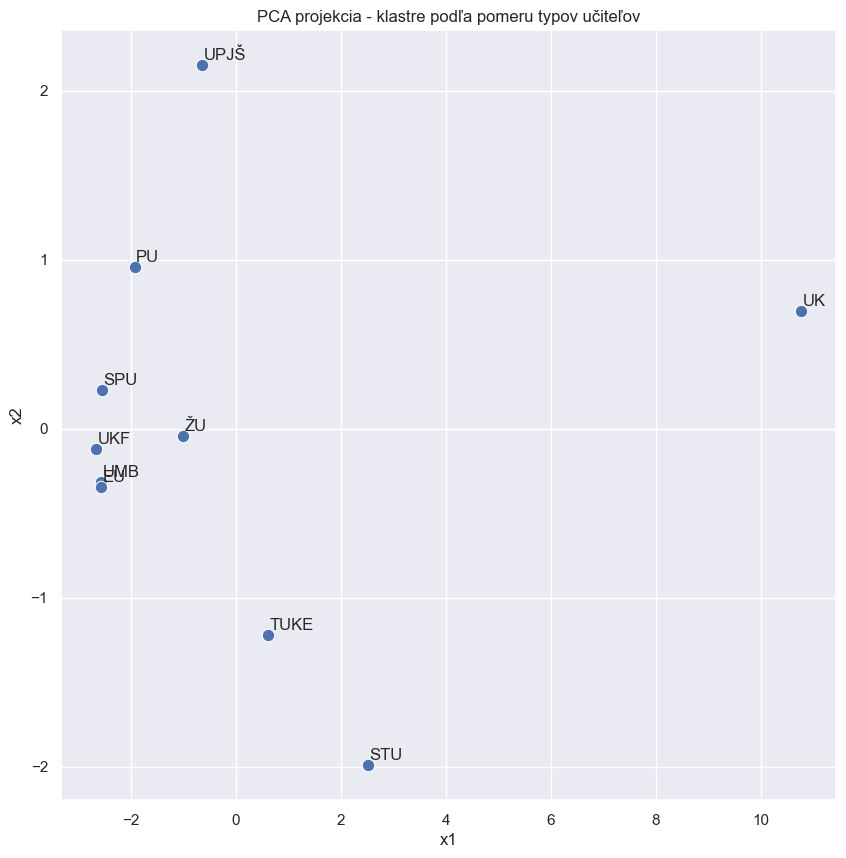

In [377]:
fig_pca, ax_pca = plt.subplots(figsize=(10, 10))
ax_pca.set_title('PCA projekcia - klastre podľa pomeru typov učiteľov')

sns.scatterplot(data=master_df, x="x1", y="x2", s=80, ax=ax_pca)
for i, row in master_df.reset_index().iterrows():
    plt.annotate(row.uni, xy=(row.x1 + 0.03, row.x2 + 0.03))
plt.show()